In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import re
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## reading the data

In [199]:
df = pd.read_csv("Data/combined_laptop_data.csv")

## EDA

In [200]:
# df_combined_numeric = df.select_dtypes(include=['number'])

# report = sv.analyze(df_combined_numeric)
# report.show_html('report.html')

In [201]:
df.isnull().sum().sort_values(ascending=False)

Product Name                 0
Product Price                0
Warranty Period(Months)      0
Processor Type               0
Screen Size(inch)            0
Operating System             0
product type                 0
Color                        0
Storage Capacity             0
RAM(GB)                      0
Network and Communication    0
Touch Display                0
Display Resolution           0
Battery Type                 0
dtype: int64

In [202]:
df.duplicated().sum()

0

In [203]:
df.describe(include='object').T

,count,unique,top,freq
Product Name,484,274,Apple MacBook Air 13 M3,18
Processor Type,484,105,Intel Core i7-1355U (13th Gen),45
Operating System,484,14,Dos,184
product type,484,6,Laptop,186
Color,484,78,Silver,48
Storage Capacity,484,35,512GB SSD M.2,158
Network and Communication,484,38,Wi-Fi/Bluetooth,141
Touch Display,484,4,False,265
Display Resolution,484,52,1920x1080,151
Battery Type,484,59,Lithium Polymer (Li-Po),98


In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Price,484.0,4306.944215,2469.442850,799.0,2299.0,3799.0,5999.0,11499.0
Warranty Period(Months),484.0,24.278926,4.146725,3.0,24.0,24.0,24.0,60.0
Screen Size(inch),484.0,14.827066,1.054082,8.8,14.0,15.3,15.6,17.3
RAM(GB),484.0,13.826446,7.183115,4.0,8.0,16.0,16.0,32.0


In [205]:
df.shape

(484, 14)

### outliers

In [206]:
df = df[df['Screen Size(inch)']> 11]

In [207]:
df.shape

(481, 14)

### Relevnce 

In [208]:
df.head()

,Product Name,Product Price,Warranty Period(Months),Processor Type,Screen Size(inch),Operating System,product type,Color,Storage Capacity,RAM(GB),Network and Communication,Touch Display,Display Resolution,Battery Type
0,Huawei MateBook 14,4299,24.0,Intel Core Ultra 5 125H,14.2,Windows 11 Home,Laptop,Space Grey,1 TB M.2 NVMe PCIe 4.0 SSD,16,Wi-Fi (6)/Bluetooth (5.1),Yes,2880 X 1920,Lithium Polymer (Li-Po)
1,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sequoia,Laptop,Space Grey,256 GB SSD,16,Wi-Fi/Bluetooth,No,2880 X 1864,Lithium Polymer (Li-Po)
2,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sonoma,Laptop,Starlight,256 GB SSD,8,Wi-Fi/Bluetooth,No,2880 X 1864,Lithium Polymer (Li-Po)
3,Asus,3799,24.0,AMD Ryzen 7-8840HS,14.0,Windows 11,Laptop,Jade Black,1 TB M.2 NVMe PCIe 4.0 SSD,16,Wi-Fi/Bluetooth,No,1920 X 1200 (WUXGA),Lithium Ion (Li-Ion) - 4 Cell
4,Microsoft Surface 7,9699,24.0,Snapdragon X Elite 12 Core,15.0,Windows 11 Home,Laptop,Black,1 TB SSD,32,Wi-Fi (7)/Bluetooth (5.4),Yes,2496 x 1664,Lithium Ion (Li-Ion) - 6 Cell


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 483
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product Name               481 non-null    object 
 1   Product Price              481 non-null    int64  
 2   Warranty Period(Months)    481 non-null    float64
 3   Processor Type             481 non-null    object 
 4   Screen Size(inch)          481 non-null    float64
 5   Operating System           481 non-null    object 
 6   product type               481 non-null    object 
 7   Color                      481 non-null    object 
 8   Storage Capacity           481 non-null    object 
 9   RAM(GB)                    481 non-null    int64  
 10  Network and Communication  481 non-null    object 
 11  Touch Display              481 non-null    object 
 12  Display Resolution         481 non-null    object 
 13  Battery Type               481 non-null    object 
dtyp

In [210]:
def clean_storage_capacity(value):
    match = re.search(r'(\d+(\.\d+)?)\s*(TB|GB)', value, re.IGNORECASE)
    if match:
        size = float(match.group(1))
        unit = match.group(3).upper()
        if unit == 'TB':
            size *= 1024
        return size 
    return None 

In [211]:
def extract_storage_type(value):
    match = re.search(r'\d+(\.\d+)?\s*(TB|GB)\s*(.*)', value, re.IGNORECASE)
    if match:
        return match.group(3).strip()
    return None 

In [212]:
#storage type
df['Storage Type'] = df['Storage Capacity'].apply(extract_storage_type)

In [213]:
# Apply the cleaning function
df['Storage Capacity (GB)'] = df['Storage Capacity'].apply(clean_storage_capacity)

In [214]:
df.head()

,Product Name,Product Price,Warranty Period(Months),Processor Type,Screen Size(inch),Operating System,product type,Color,Storage Capacity,RAM(GB),Network and Communication,Touch Display,Display Resolution,Battery Type,Storage Type,Storage Capacity (GB)
0,Huawei MateBook 14,4299,24.0,Intel Core Ultra 5 125H,14.2,Windows 11 Home,Laptop,Space Grey,1 TB M.2 NVMe PCIe 4.0 SSD,16,Wi-Fi (6)/Bluetooth (5.1),Yes,2880 X 1920,Lithium Polymer (Li-Po),M.2 NVMe PCIe 4.0 SSD,1024.0
1,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sequoia,Laptop,Space Grey,256 GB SSD,16,Wi-Fi/Bluetooth,No,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0
2,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sonoma,Laptop,Starlight,256 GB SSD,8,Wi-Fi/Bluetooth,No,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0
3,Asus,3799,24.0,AMD Ryzen 7-8840HS,14.0,Windows 11,Laptop,Jade Black,1 TB M.2 NVMe PCIe 4.0 SSD,16,Wi-Fi/Bluetooth,No,1920 X 1200 (WUXGA),Lithium Ion (Li-Ion) - 4 Cell,M.2 NVMe PCIe 4.0 SSD,1024.0
4,Microsoft Surface 7,9699,24.0,Snapdragon X Elite 12 Core,15.0,Windows 11 Home,Laptop,Black,1 TB SSD,32,Wi-Fi (7)/Bluetooth (5.4),Yes,2496 x 1664,Lithium Ion (Li-Ion) - 6 Cell,SSD,1024.0


In [215]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df,title='laptops')
# profile.to_notebook_iframe()

In [216]:
df.drop(columns= 'product type', inplace=True)
df.drop(columns= 'Storage Capacity', inplace=True)
df.drop(columns= 'Network and Communication', inplace=True)

In [217]:
df.head()

,Product Name,Product Price,Warranty Period(Months),Processor Type,Screen Size(inch),Operating System,Color,RAM(GB),Touch Display,Display Resolution,Battery Type,Storage Type,Storage Capacity (GB)
0,Huawei MateBook 14,4299,24.0,Intel Core Ultra 5 125H,14.2,Windows 11 Home,Space Grey,16,Yes,2880 X 1920,Lithium Polymer (Li-Po),M.2 NVMe PCIe 4.0 SSD,1024.0
1,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sequoia,Space Grey,16,No,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0
2,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sonoma,Starlight,8,No,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0
3,Asus,3799,24.0,AMD Ryzen 7-8840HS,14.0,Windows 11,Jade Black,16,No,1920 X 1200 (WUXGA),Lithium Ion (Li-Ion) - 4 Cell,M.2 NVMe PCIe 4.0 SSD,1024.0
4,Microsoft Surface 7,9699,24.0,Snapdragon X Elite 12 Core,15.0,Windows 11 Home,Black,32,Yes,2496 x 1664,Lithium Ion (Li-Ion) - 6 Cell,SSD,1024.0


In [218]:
df['Touch Display'].value_counts()

Touch Display
False    265
No       165
True      29
Yes       22
Name: count, dtype: int64

In [219]:
df['Touch Display'] = df['Touch Display'].apply(lambda x: True if str(x).lower() in ['yes', 'true'] else False)

In [220]:
df['Touch Display'].value_counts()

Touch Display
False    430
True      51
Name: count, dtype: int64

In [221]:
def process_resolution(value):
    match = re.search(r'(\d+)\s*[xX×]\s*(\d+)', value)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
        return pd.Series([width, height])
    return pd.Series([None, None])

In [222]:
df[['Pixels Width', 'Pixels Height']] = df['Display Resolution'].apply(process_resolution)

In [223]:
df.head()

,Product Name,Product Price,Warranty Period(Months),Processor Type,Screen Size(inch),Operating System,Color,RAM(GB),Touch Display,Display Resolution,Battery Type,Storage Type,Storage Capacity (GB),Pixels Width,Pixels Height
0,Huawei MateBook 14,4299,24.0,Intel Core Ultra 5 125H,14.2,Windows 11 Home,Space Grey,16,True,2880 X 1920,Lithium Polymer (Li-Po),M.2 NVMe PCIe 4.0 SSD,1024.0,2880,1920
1,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sequoia,Space Grey,16,False,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0,2880,1864
2,Apple MacBook Air 15 M3,5999,24.0,M3 8-core CPU,15.3,macOS Sonoma,Starlight,8,False,2880 X 1864,Lithium Polymer (Li-Po),SSD,256.0,2880,1864
3,Asus,3799,24.0,AMD Ryzen 7-8840HS,14.0,Windows 11,Jade Black,16,False,1920 X 1200 (WUXGA),Lithium Ion (Li-Ion) - 4 Cell,M.2 NVMe PCIe 4.0 SSD,1024.0,1920,1200
4,Microsoft Surface 7,9699,24.0,Snapdragon X Elite 12 Core,15.0,Windows 11 Home,Black,32,True,2496 x 1664,Lithium Ion (Li-Ion) - 6 Cell,SSD,1024.0,2496,1664


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 483
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             481 non-null    object 
 1   Product Price            481 non-null    int64  
 2   Warranty Period(Months)  481 non-null    float64
 3   Processor Type           481 non-null    object 
 4   Screen Size(inch)        481 non-null    float64
 5   Operating System         481 non-null    object 
 6   Color                    481 non-null    object 
 7   RAM(GB)                  481 non-null    int64  
 8   Touch Display            481 non-null    bool   
 9   Display Resolution       481 non-null    object 
 10  Battery Type             481 non-null    object 
 11  Storage Type             481 non-null    object 
 12  Storage Capacity (GB)    481 non-null    float64
 13  Pixels Width             481 non-null    int64  
 14  Pixels Height            481 no

## preprossing for model

In [225]:
label_encoder = LabelEncoder()
df['Processor_Type_encoded'] = label_encoder.fit_transform(df['Processor Type'])
df['Operating_System_encoded'] = label_encoder.fit_transform(df['Operating System'])
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])
df['Display_Resolution_encoded'] = label_encoder.fit_transform(df['Display Resolution'])
df['Battery_Type_encoded'] = label_encoder.fit_transform(df['Battery Type'])
df['Storage_Type_encoded'] = label_encoder.fit_transform(df['Storage Type'])

In [226]:
df['Product_Name_encoded'] = label_encoder.fit_transform(df['Product Name'])

In [227]:
df.dtypes

Product Name                   object
Product Price                   int64
Warranty Period(Months)       float64
Processor Type                 object
Screen Size(inch)             float64
Operating System               object
Color                          object
RAM(GB)                         int64
Touch Display                    bool
Display Resolution             object
Battery Type                   object
Storage Type                   object
Storage Capacity (GB)         float64
Pixels Width                    int64
Pixels Height                   int64
Processor_Type_encoded          int32
Operating_System_encoded        int32
Color_encoded                   int32
Display_Resolution_encoded      int32
Battery_Type_encoded            int32
Storage_Type_encoded            int32
Product_Name_encoded            int32
dtype: object

In [228]:
df_model = df

In [229]:
df_model.drop(columns=['Product Name','Processor Type','Operating System','Color','Display Resolution','Battery Type','Storage Type'], inplace=True)

In [230]:
df_model.dtypes

Product Price                   int64
Warranty Period(Months)       float64
Screen Size(inch)             float64
RAM(GB)                         int64
Touch Display                    bool
Storage Capacity (GB)         float64
Pixels Width                    int64
Pixels Height                   int64
Processor_Type_encoded          int32
Operating_System_encoded        int32
Color_encoded                   int32
Display_Resolution_encoded      int32
Battery_Type_encoded            int32
Storage_Type_encoded            int32
Product_Name_encoded            int32
dtype: object

In [231]:
df_model = df[['Product Price',
               'RAM(GB)',
               'Storage Capacity (GB)',
              'Storage_Type_encoded'
              ]]

In [232]:
df_model.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_model.rename(columns=lambda x: x.replace('(GB)', 'GB'), inplace=True)

In [233]:
df_model.dtypes

Product_Price             int64
RAMGB                     int64
Storage_Capacity_GB     float64
Storage_Type_encoded      int32
dtype: object

## prepering the data

In [234]:
df_model.shape

(481, 4)

In [235]:
df_model = df_model[df_model['Product_Price']>= 900] 
df_model = df_model[df_model['RAMGB']> 4] 
df_model = df_model[df_model['Storage_Capacity_GB']>= 200] 

In [236]:
# Prepare data
X = df_model


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [237]:
X.shape

(457, 4)

## Buliding the Model - k-means

In [238]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=800,
                    n_init=50,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


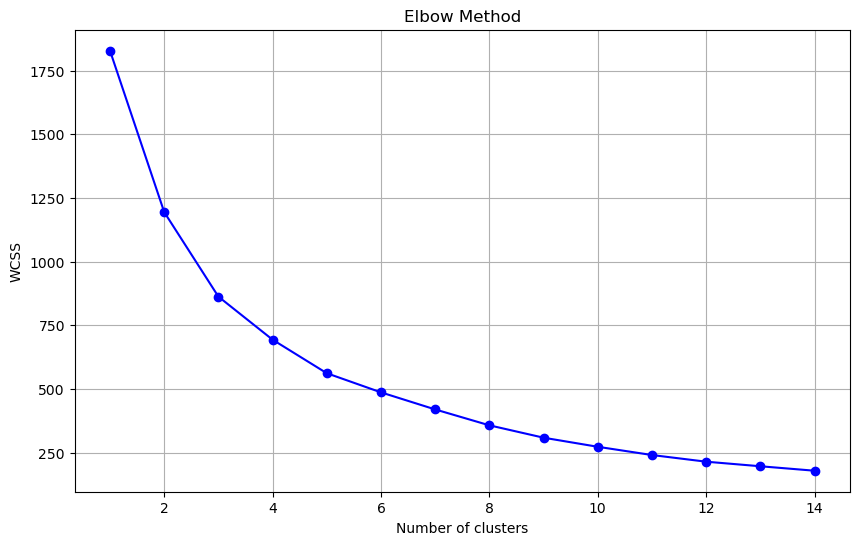

In [239]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [240]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 4
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=800, n_init=50, random_state=0)

In [241]:
optimal_clusters

4

## Train and Test the Model

In [242]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model

In [243]:
X.head(2)

,Product_Price,RAMGB,Storage_Capacity_GB,Storage_Type_encoded
0,4299,16,1024.0,4
1,5999,16,256.0,13


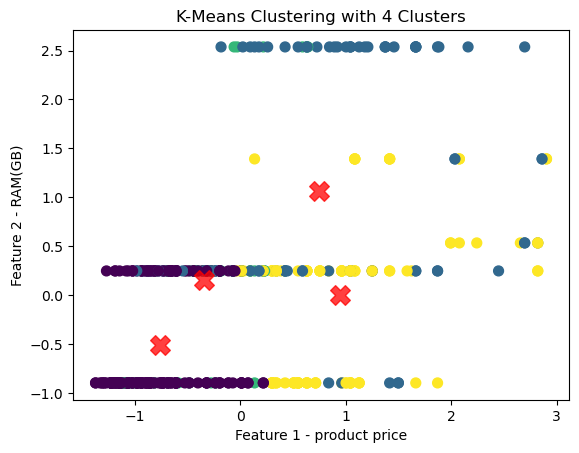

In [244]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1 - product price')
plt.ylabel('Feature 2 - RAM(GB)')
plt.show()

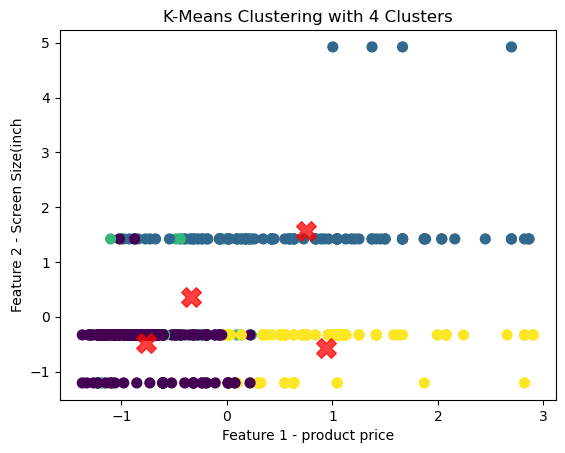

In [245]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1 - product price')
plt.ylabel('Feature 2 - Screen Size(inch')
plt.show()

In [246]:
X['kmeans'] = y_pred

In [247]:
X['kmeans'].value_counts()

kmeans
0    205
3    111
1     92
2     49
Name: count, dtype: int64

In [248]:
df_0 = X[X['kmeans']==0]

In [249]:
df_1 = X[X['kmeans']==1]

In [250]:
df_2 = X[X['kmeans']==2]

In [251]:
df_3 = X[X['kmeans']==3]

In [252]:
df_0.shape

(205, 5)

In [253]:
df_3

,Product_Price,RAMGB,Storage_Capacity_GB,Storage_Type_encoded,kmeans
1,5999,16,256.0,13,3
2,5999,8,256.0,13,3
14,4499,16,256.0,13,3
17,5699,8,512.0,13,3
18,6299,16,512.0,13,3
...,...,...,...,...,...
457,5799,8,512.0,13,3
458,5799,8,512.0,14,3
460,5799,8,256.0,14,3
465,9299,18,512.0,13,3


In [254]:
df_1.shape

(92, 5)

In [255]:
df_2.shape

(49, 5)

In [256]:
df_3.shape

(111, 5)

In [257]:
df_3

,Product_Price,RAMGB,Storage_Capacity_GB,Storage_Type_encoded,kmeans
1,5999,16,256.0,13,3
2,5999,8,256.0,13,3
14,4499,16,256.0,13,3
17,5699,8,512.0,13,3
18,6299,16,512.0,13,3
...,...,...,...,...,...
457,5799,8,512.0,13,3
458,5799,8,512.0,14,3
460,5799,8,256.0,14,3
465,9299,18,512.0,13,3


In [258]:
# Assuming 'df' is your DataFrame
df_0.to_csv('df_0.csv', index=False)

In [259]:
# Assuming 'df' is your DataFrame
df_1.to_csv('df_1.csv', index=False)

In [260]:
# Assuming 'df' is your DataFrame
df_2.to_csv('df_2.csv', index=False)

In [261]:
# Assuming 'df' is your DataFrame
df_3.to_csv('df_3.csv', index=False)

## API

In [262]:
import joblib
joblib.dump(model, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [263]:
dbscan = DBSCAN(eps=0.4, min_samples=13) 
clusters = dbscan.fit_predict(X_scaled)  # Get cluster labels

In [264]:
# Add the cluster labels to the DataFrame
df_model['Cluster'] = clusters 

In [265]:
#outliers
outliers = df_model[df_model['Cluster'] == -1]

In [266]:
print("Number of outliers (noise points):", len(outliers))

Number of outliers (noise points): 168


In [267]:
# Count the number of points in each cluster (including outliers)
print(pd.Series(clusters).value_counts())

-1    168
 4     92
 6     68
 2     41
 1     27
 0     25
 3     22
 5     14
Name: count, dtype: int64


In [268]:
# Filter valid (non-noise) data for silhouette score calculation
valid_labels = clusters != -1
valid_scaled_data = X_scaled[valid_labels]
valid_dbscan_labels = clusters[valid_labels]

In [269]:
# Calculate the silhouette score
score = silhouette_score(valid_scaled_data, valid_dbscan_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6221150742970064


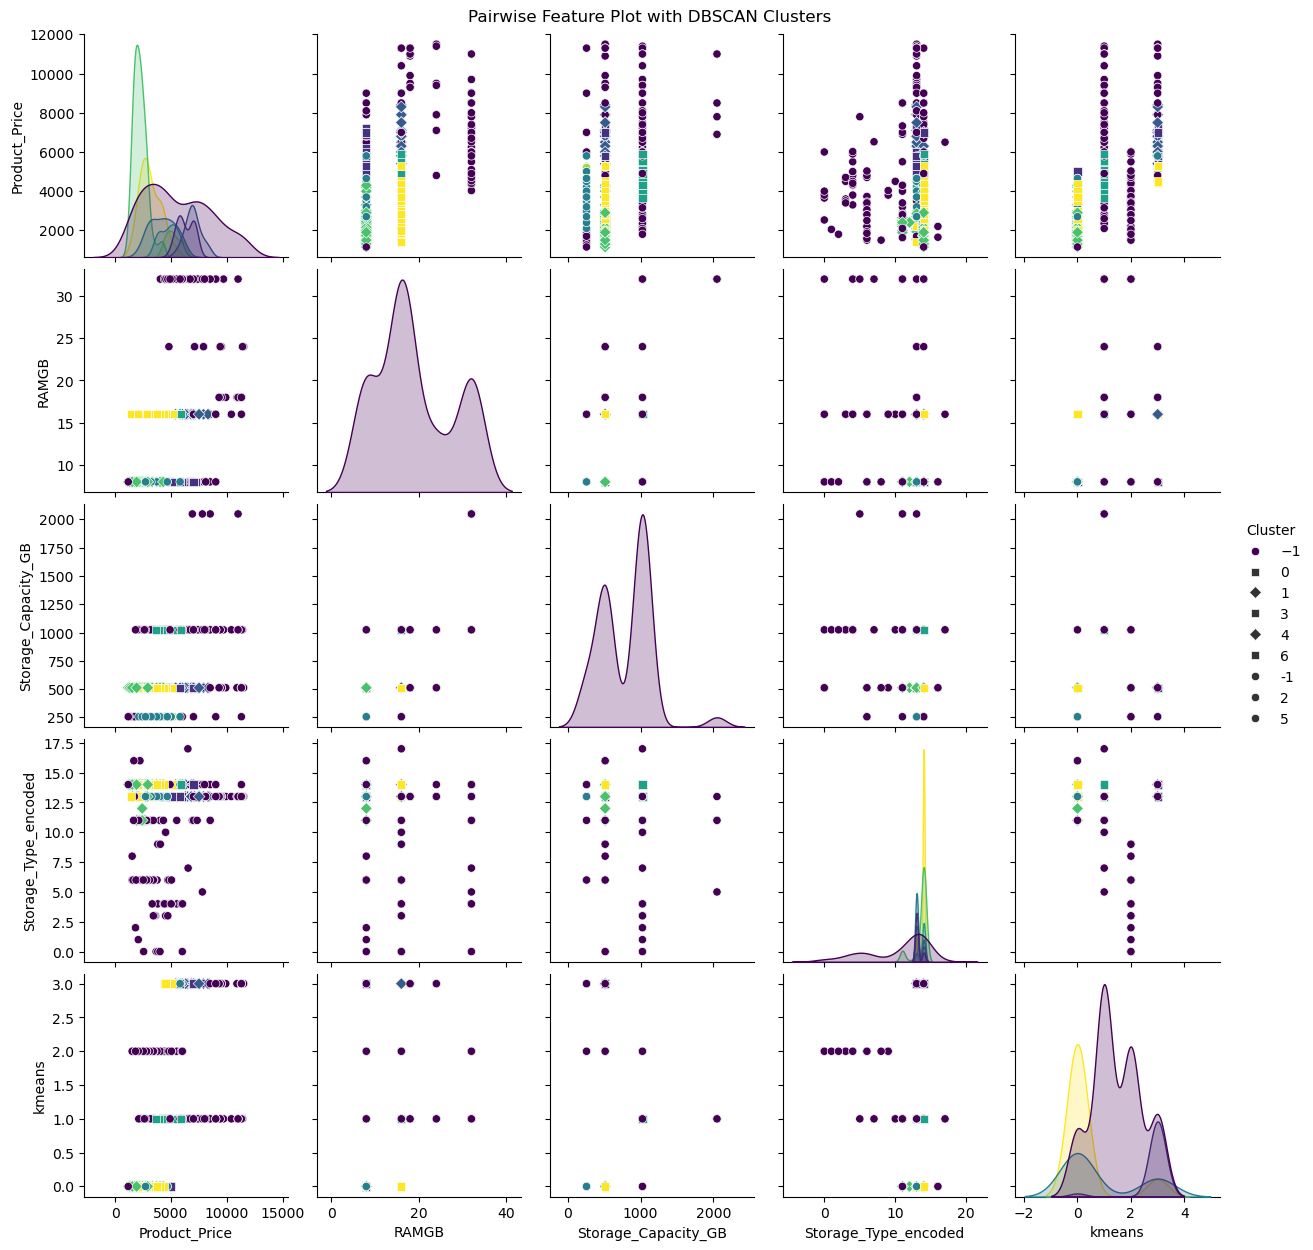

In [270]:
# Create pairplot to visualize the clusters
sns.pairplot(df_model, hue='Cluster', palette='viridis', markers=["o", "s", "D"])
plt.suptitle("Pairwise Feature Plot with DBSCAN Clusters", y=1)
plt.show()

In [271]:
# Check the number of features expected by the model
print("Number of features expected by the model:", model.n_features_in_)

Number of features expected by the model: 4


In [272]:
# Check if the scaler object has the feature names attribute
if hasattr(scaler, "feature_names_in_"):
    print("Feature names used for training:", scaler.feature_names_in_)

Feature names used for training: ['Product_Price' 'RAMGB' 'Storage_Capacity_GB' 'Storage_Type_encoded']
